# Algorithmics Project

In [72]:
import random
import time
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import copy

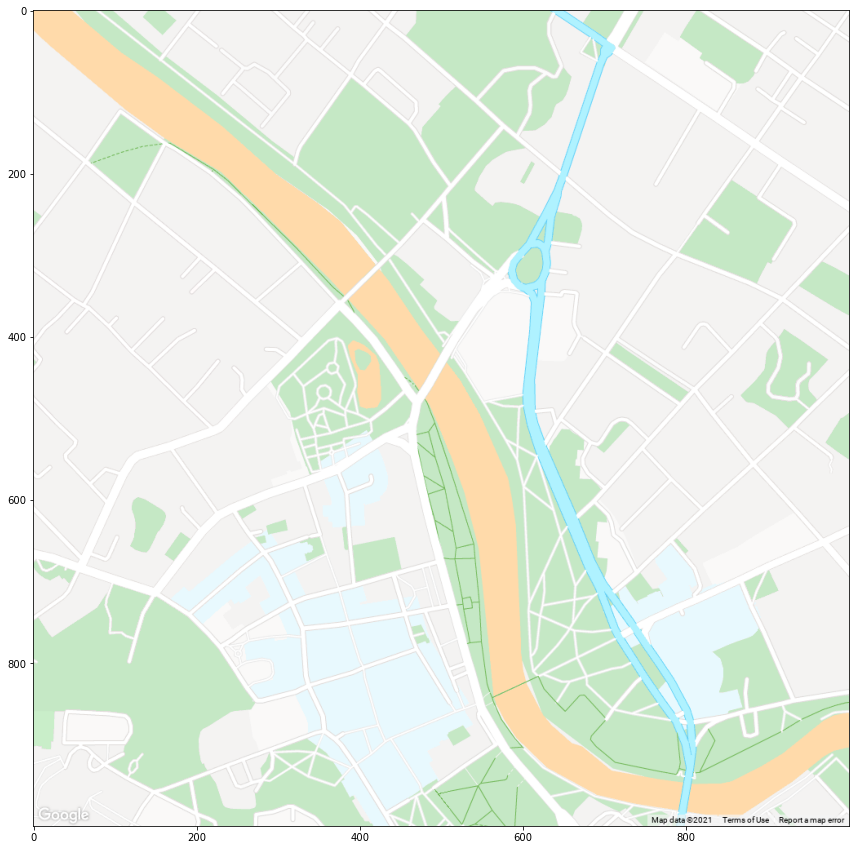

In [3]:
img = cv2.imread('map-image.png') # read an image from a file using
plt.figure(figsize=(15,15))
plt.imshow(img) # show the image
plt.show()

In [95]:
print(img[580,550]) #orange
print(img[600,650]) #blue
print(img[800,400]) #light blue
print(img[200,800]) #gray
print(img[580,600]) #white
print(img[800,200]) #green

[255 218 170]
[175 242 255]
[235 234 234]
[244 243 242]
[0 0 0]
[197 232 197]


In [4]:
#Make vertex class 
class Vertex:
    def __init__(self,x_coord,y_coord):
        self.x=x_coord
        self.y=y_coord
        self.dist=float('inf')#distance from source
        self.parent_x=None
        self.parent_y=None
        self.visited=False
        self.index_in_queue=None

In [5]:
#Get 8 direction neighbors 
def get_neighbors(mat,r,c):
    shape=mat.shape
    neighbors=[]
    if c > 0 and not mat[r][c-1].visited: #left
        neighbors.append(mat[r][c-1])
        
    if c < shape[1] - 1 and not mat[r][c+1].visited: #right
        neighbors.append(mat[r][c+1])
        
    if r > 0 and not mat[r-1][c].visited: #above
        neighbors.append(mat[r-1][c])
        
    if r < shape[0] - 1 and not mat[r+1][c].visited: #below
        neighbors.append(mat[r+1][c])
        
    if c > 0 and r > 0 and not mat[r-1][c-1].visited: #above left
        neighbors.append(mat[r-1][c-1])
        
    if c < shape[1] - 1 and r > 0 and not mat[r-1][c+1].visited:  #above right
        neighbors.append(mat[r-1][c+1])
        
    if r < shape[0] - 1 and c > 0 and not mat[r+1][c-1].visited: #below left
        neighbors.append(mat[r+1][c-1])
        
    if c < shape[1] - 1 and r < shape[0] - 1 and not mat[r+1][c+1].visited: #below right
            neighbors.append(mat[r+1][c+1])
    
    return neighbors

In [6]:
#Fix the min heap queue
def bubble_up(queue, index):
    if index <= 0:
        return queue
    p_index=(index-1)//2
    if queue[index].dist < queue[p_index].dist:
            queue[index], queue[p_index]=queue[p_index], queue[index]
            queue[index].index_in_queue=index
            queue[p_index].index_in_queue=p_index
            quque = bubble_up(queue, p_index)
    return queue
    
def bubble_down(queue, index):
    length=len(queue)
    lc_index=2*index+1
    rc_index=lc_index+1
    if lc_index >= length:
        return queue
    if lc_index < length and rc_index >= length: #just left child
        if queue[index].dist > queue[lc_index].dist:
            queue[index], queue[lc_index]=queue[lc_index], queue[index]
            queue[index].index_in_queue=index
            queue[lc_index].index_in_queue=lc_index
            queue = bubble_down(queue, lc_index)
    else:
        small = lc_index
        if queue[lc_index].dist > queue[rc_index].dist:
            small = rc_index
        if queue[small].dist < queue[index].dist:
            queue[index],queue[small]=queue[small],queue[index]
            queue[index].index_in_queue=index
            queue[small].index_in_queue=small
            queue = bubble_down(queue, small)
    return queue

In [39]:
def get_dist(img,u,v):
    if float((u[0]-v[0])**2) + float((u[1]-v[1])**2) == 2:
        if ((img[v] == [255,255,255]).all()) or (img[u] == [255,255,255]).all(): 
            return float(np.sqrt(2))
        if ((img[v] == [175,242,255]).all()) or (img[u] == [175,242,255]).all():
            return float(np.sqrt(2))
        else:
            return float(10000000)
        
    if float((u[0]-v[0])**2) + float((u[1]-v[1])**2) == 1:
        if ((img[v] == [255,255,255]).all()) or (img[u] == [255,255,255]).all(): 
            return float(np.sqrt(2))
        if ((img[v] == [175,242,255]).all()) or (img[u] == [175,242,255]).all():
            return float(np.sqrt(2))
        else:
            return float(10000000)
    

def find_shortest_path_D(img,src,dst):
    pq=[] #min-heap priority queue
    #visit = []
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]
    imagerows,imagecols=img.shape[0],img.shape[1]
    matrix = np.full((imagerows, imagecols), None) #access by matrix[row][col]
    for r in range(imagerows):
        for c in range(imagecols):
            matrix[r][c]=Vertex(c,r)
            matrix[r][c].index_in_queue=len(pq)
            pq.append(matrix[r][c])
    matrix[source_y][source_x].dist=float(0)
    pq=bubble_up(pq, matrix[source_y][source_x].index_in_queue)
    while not matrix[dest_y][dest_x].visited:
        u=pq[0]
        u.visited=True
        #visit.append((u.x,u.y))
        pq[0]=pq[-1]
        pq[0].index_in_queue=0
        pq.pop()
        pq=bubble_down(pq,0)
        neighbor = get_neighbors(matrix,u.y,u.x)
        for v in neighbor:
            distance=get_dist(img,(u.x,u.y),(v.x,v.y))
            if u.dist + distance < v.dist:
                v.dist = u.dist+distance
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=bubble_down(pq,idx)
                pq=bubble_up(pq,idx)
    path=[]
    iter_v=matrix[dest_y][dest_x]
    path.append((dest_x,dest_y))
    distance_total = iter_v.dist
    while(iter_v.y!=source_y or iter_v.x!=source_x):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.parent_y][iter_v.parent_x]
    path.append((source_x,source_y))
    distance_result = distance_total - int(distance_total/10000000)*10000000
    return path,distance_result

In [7]:
def get_dist(img,u,v):
    if float((u[0]-v[0])**2) + float((u[1]-v[1])**2) == 2:
        if ((img[v] == [255,255,255]).all()) or (img[u] == [255,255,255]).all(): 
            return float(np.sqrt(2))
        if ((img[v] == [175,242,255]).all()) or (img[u] == [175,242,255]).all():
            return float(np.sqrt(2))
        else:
            return float(10000000)
        
    if float((u[0]-v[0])**2) + float((u[1]-v[1])**2) == 1:
        if ((img[v] == [255,255,255]).all()) or (img[u] == [255,255,255]).all(): 
            return float(np.sqrt(2))
        if ((img[v] == [175,242,255]).all()) or (img[u] == [175,242,255]).all():
            return float(np.sqrt(2))
        else:
            return float(10000000)
    
def goal_dist(v,dst):
      return float(np.sqrt((v[0]-dst[0])**2 + (v[1]-dst[1])**2))
    
    

def find_shortest_path(img,src,dst):
    visit = []
    pq=[] #min-heap priority queue
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]
    imagerows,imagecols=img.shape[0],img.shape[1]
    matrix = np.full((imagerows, imagecols), None) #access by matrix[row][col]
    for r in range(imagerows):
        for c in range(imagecols):
            matrix[r][c]=Vertex(c,r)
            matrix[r][c].index_in_queue=len(pq)
            pq.append(matrix[r][c])
    matrix[source_y][source_x].dist=float(0)
    pq=bubble_up(pq, matrix[source_y][source_x].index_in_queue)
    inf_dist = 0
    while not matrix[dest_y][dest_x].visited:
        u=pq[0]
        u.visited=True
        visit.append((u.x,u.y))
        pq[0]=pq[-1]
        pq[0].index_in_queue=0
        pq.pop()
        pq=bubble_down(pq,0)
        neighbor = get_neighbors(matrix,u.y,u.x)
        u_goal = goal_dist((u.y,u.x),(dest_y,dest_x))
        if u.dist == float(0):
            u.dist += u_goal
        u.dist -= u_goal
        for v in neighbor:
            distance=get_dist(img,(u.x,u.y),(v.x,v.y))
            distance_g = goal_dist((v.y,v.x),(dest_y,dest_x))
            if (u.dist + distance + distance_g) < v.dist:
                #print(u.x, u.y,img[u.x,u.y], u.dist, distance, distance_g, u.dist + distance + distance_g, v.dist)
                v.dist = u.dist + distance + distance_g
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=bubble_down(pq,idx)
                pq=bubble_up(pq,idx)
        u.dist += u_goal
            
    path=[]
    iter_v=matrix[dest_y][dest_x]
    path.append((dest_x,dest_y))
    distance_total = iter_v.dist
    while(iter_v.y!=source_y or iter_v.x!=source_x):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.parent_y][iter_v.parent_x]
    path.append((source_x,source_y))
    distance_result = distance_total - int(distance_total/10000000)*10000000
    return path,visit,distance_result

In [94]:
def random_point(img,n):
    points = []
    count = 0
    while count < n:
        x=random.randint(0,990)
        y=random.randint(0,990)
        #print(x,y)
        if (img[x,y] == [255,218,170]).all():
            print("Its on the water")
            continue
        img[x,y] = [0,0,0]
        for i in range(5):
            for j in range(5):
                img[x+i,y+j] = [0,0,0]
        
        if count == 0:
            for i in range(10):
                for j in range(10):
                    img[x+i,y+j] = [255,70,170]
        count += 1
        points.append((x,y))
    print(points)
    return points

Its on the water
Its on the water
Its on the water
Its on the water
[(934, 240), (582, 245), (819, 512), (46, 512), (59, 988)]


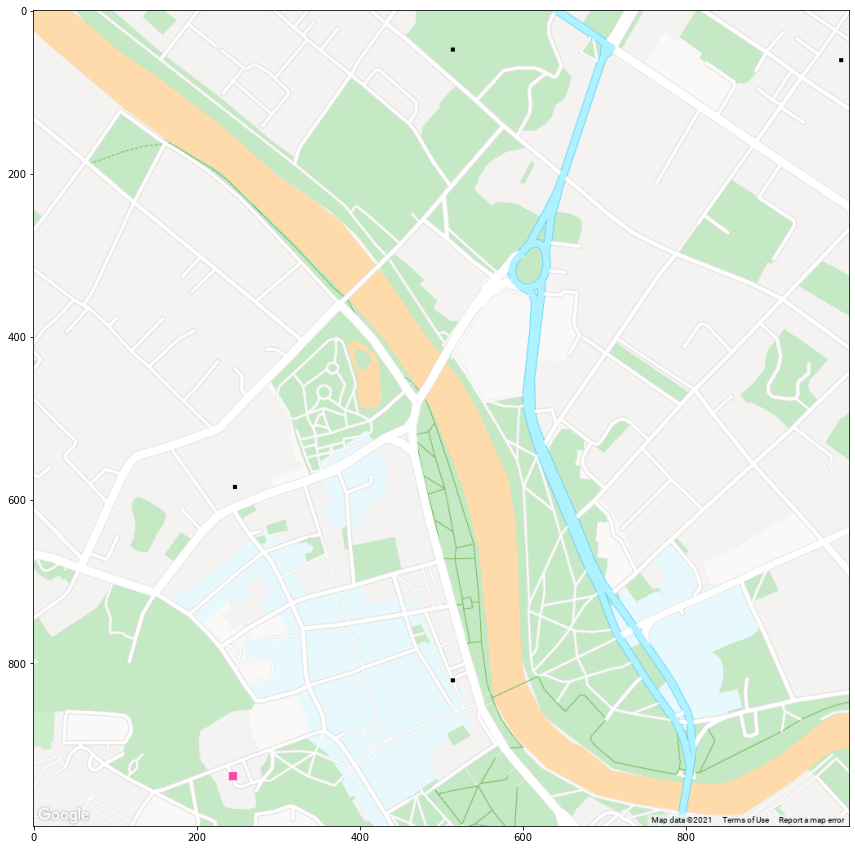

In [109]:
img = cv2.imread('map-image.png')
visit_point = random_point(img,5) #4 place to visit
plt.figure(figsize=(15,15))
plt.imshow(img) # show the image
plt.show()

In [110]:
dist_order = {}
path_order = {}
path_store = []
result_distance = 0
places = copy.copy(visit_point)
current = places[0]
start = time.time()
while len(places) > 1:
    places.remove(current)
    dist_order = {}
    path_order = {}
    for data in places:
        shortest_path, distance = find_shortest_path_D(img,current,data)
        dist_order[data] = distance
        path_order[data] = shortest_path
    if len(dist_order) == 1:
        path = dist_order
    else:
        path = dict(sorted(dist_order.items(), key=lambda item: item[1])[:1])    
    path_store.extend(path_order[list(path.keys())[0]])
    result_distance += dist_order[list(path.keys())[0]]
    current = list(path.keys())[0]
end = time.time()
elapsed = float(end - start)
print("Runtime = ", elapsed)

Runtime =  899.9054489135742


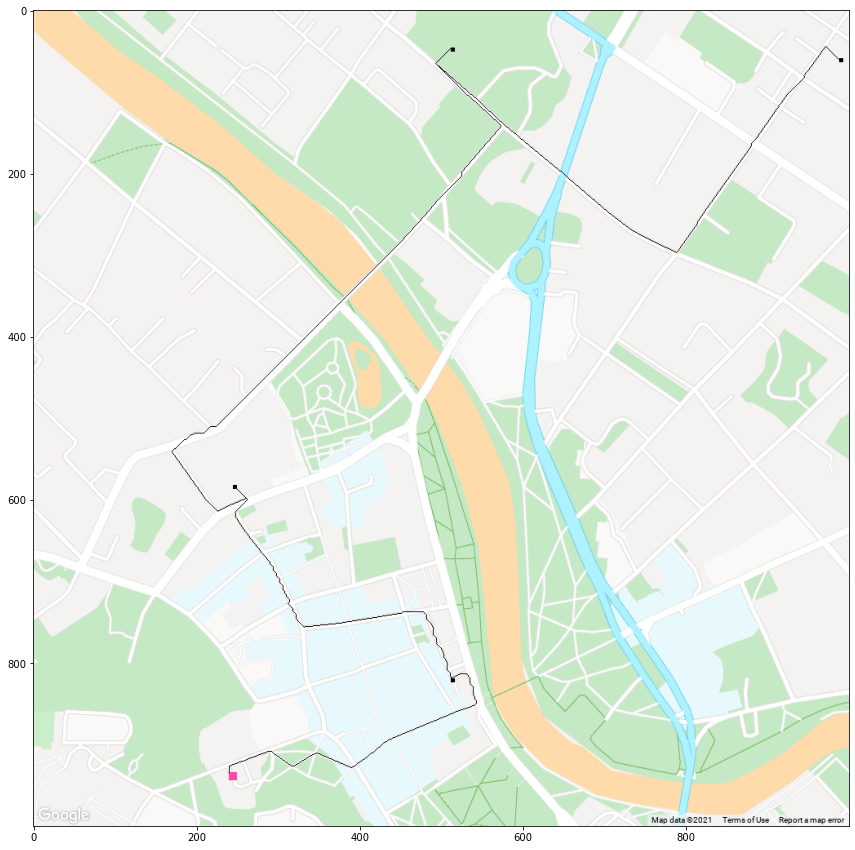

In [111]:
for pixcel in path_store:
    #print(img[pixcel[0],pixcel[1]])
    img[pixcel[0],pixcel[1]] = [0,0,0]
plt.figure(figsize=(15,15))
plt.imshow(img) # show the image
plt.show()

In [112]:
dist_order = {}
path_order = {}
path_store = []
worst_distance = 0
places = copy.copy(visit_point)
current = places[0]
start = time.time()
while len(places) > 1:
    places.remove(current)
    dist_order = {}
    path_order = {}
    for data in places:
        shortest_path, distance = find_shortest_path_D(img,current,data)
        dist_order[data] = distance
        path_order[data] = shortest_path
    if len(dist_order) == 1:
        worst_path = dist_order
    else:
        worst_path = dict(sorted(dist_order.items(), key=lambda item: item[1] ,reverse = True)[:1])    
    path_store.extend(path_order[list(worst_path.keys())[0]])
    worst_distance += dist_order[list(worst_path.keys())[0]]
    current = list(worst_path.keys())[0]
end = time.time()
elapsed = float(end - start)
print("Runtime = ", elapsed)

Runtime =  854.4357397556305


In [116]:
img = cv2.imread('map-image.png')
count = 0 
for data in visit_point:
    for i in range(5):
        for j in range(5):
            img[data[0]+i,data[1]+j] = [0,0,0]
        
    if count == 0:
        for i in range(10):
            for j in range(10):
                img[data[0]+i,data[1]+j] = [255,70,170]
    count += 1
# plt.figure(figsize=(15,15))
# plt.imshow(img) # show the image
# plt.show()

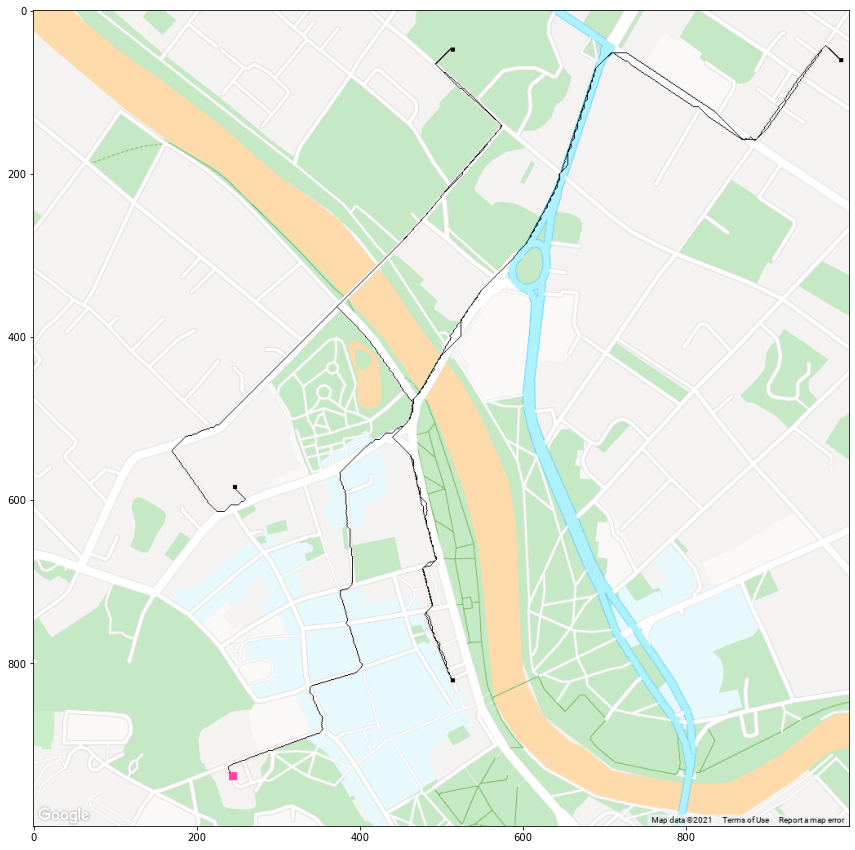

In [117]:
#img = cv2.imread('map-image.png')
for pixcel in path_store:
    #print(img[pixcel[0],pixcel[1]])
    img[pixcel[0],pixcel[1]] = [0,0,0]
plt.figure(figsize=(15,15))
plt.imshow(img) # show the image
plt.show()

In [118]:
print("optimal path distance = ", result_distance,"worst path distance = ", worst_distance)

optimal path distance =  2711.0474055778423 worst path distance =  5317.443003952503
